# Clustering to identify autistic individuals

The **Social Communication Questionnaire (SCQ)** is a tool the clinicians use to screen an individual for autism spectrum disorder (ASD). It is completed by parents and/or other caregivers who are familiar with the individual's developmental history and current behavior.

The dataset used here is obtained from the Simons Foundation for Autism Research. The data (stored in an excel file) is de-identified and does not contain any personally identifying information. It only has **age** and **SCQ scores** of individuals, who are only identified by a code name. No other medical or diagnosis information is provided.

The goal of the project is to explore the dataset and gain insights into the individuals who (or their caregiver/parents) participated in the survey.



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Reading in the Excel data file provided by the Simons Foundation.

df = pd.read_excel('SPARK_SCQ_scores.xlsx')


In [6]:
# Since each subject's data is unique to him or her, any missing values have to be deleted 
# and eliminated from analysis.

df.dropna(inplace=True)

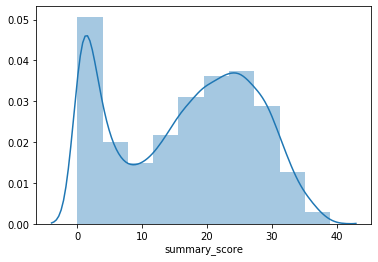

In [10]:
# Histogram showing the distribution of the SCQ scores in the tested sample of subjects.
sns.distplot(df['summary_score'], bins=10)

#### The histogram reveals two distinct peaks in the data sample. To group the data into 2 clusters (each with a distinct peak), I use K-Means clustering.

In [11]:
# Reading in the SCQ score into a numpy array.
X = np.array(df['summary_score']).reshape(-1,1)

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters = 2)

In [14]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
df['predicted_labels'] = kmeans.labels_


### Exploring the characteristics of subjects belonging to the two clusters.

In [35]:
# Created two dataframes each corresponding to specific labels.

label0_df = df[df['predicted_labels'] == 0]

label1_df = df[df['predicted_labels'] == 1]

Text(0, 0.5, 'Age (years)')

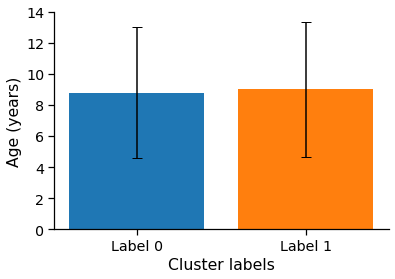

In [56]:
sns.set_style()

sns.set_context(context='notebook', font_scale = 1.3)

ax = plt.bar('Label 0', label0_df['age_at_eval_months'].mean()/12, yerr = label0_df['age_at_eval_months'].std()/12, capsize=5)

plt.bar('Label 1', label1_df['age_at_eval_months'].mean()/12, yerr = label1_df['age_at_eval_months'].std()/12, capsize = 5)

plt.ylim(0,14)

sns.despine()

plt.xlabel('Cluster labels')

plt.ylabel('Age (years)')

Text(0.75, 13, 'n = 16988')

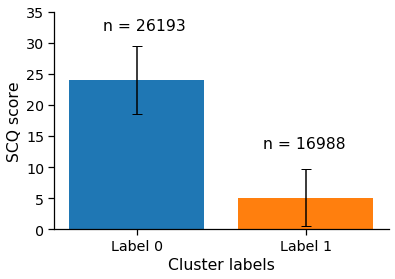

In [184]:
ax2 = plt.bar('Label 0', label0_df['summary_score'].mean(), yerr=label0_df['summary_score'].std(), capsize=5)

plt.bar('Label 1', label1_df['summary_score'].mean(), yerr=label1_df['summary_score'].std(), capsize = 5)

sns.despine()
plt.ylim(0,35)
plt.ylabel('SCQ score')
plt.xlabel('Cluster labels')

plt.text(-0.2, 32,('n = ' + str(label0_df.shape[0])))

plt.text(0.75, 13,'n = ' + str(label1_df.shape[0]))

### Label 0, with 26, 193 subjects, has significantly higher SCQ score than Label 1 (16,988 subjects).

### Label 0 is the cluster of individuals most likely on the Autism spectrum. 

### Label 1 is the cluster of individuals who are most likely neurologically-intact.